In [1]:
import os
import sys

os.environ["SPARK_HOME"] = "/usr/spark2.4.3"
os.environ["PYLIB"] = os.environ["SPARK_HOME"] + "/python/lib"
os.environ["PYSPARK_PYTHON"] = "/usr/local/anaconda/bin/python" 
os.environ["PYSPARK_DRIVER_PYTHON"] = "/usr/local/anaconda/bin/python"
sys.path.insert(0, os.environ["PYLIB"] +"/py4j-0.10.7-src.zip")
sys.path.insert(0, os.environ["PYLIB"] +"/pyspark.zip")
 
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext

from pyspark.sql import SparkSession
from functools import reduce
from pyspark.sql.functions import col, lit, when
#from graphframes import *

In [2]:
# Import libraries and other functions
from io import StringIO
from collections import namedtuple
from pyspark.sql import Row
from pyspark.sql.types import *
from pyspark.sql.functions import *

import csv
import matplotlib.pyplot as plt
import gmplot
import pandas as pd
import numpy as np

In [3]:
# import and define spark context
from pyspark import SparkContext, SparkConf
conf = SparkConf().setAppName("appName")
sc = SparkContext(conf=conf)

# test that config loaded correctly
rdd = sc.textFile("/data/mr/wordcount/input/")
print(rdd.take(10))
print(sc.version)


['The Project Gutenberg EBook of The Adventures of Sherlock Holmes', 'by Sir Arthur Conan Doyle', '(#15 in our series by Sir Arthur Conan Doyle)', '', 'Copyright laws are changing all over the world. Be sure to check the', 'copyright laws for your country before downloading or redistributing', 'this or any other Project Gutenberg eBook.', '', 'This header should be the first thing seen when viewing this Project', 'Gutenberg file.  Please do not remove it.  Do not change or edit the']
2.4.3


In [4]:
#define SQL Context

from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

In [5]:
# NEW SPARK DEFINITION
import pyspark
from pyspark import SparkConf
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
sqlContext = SQLContext(spark)


In [6]:
#importing all files together directly in a data frame that contains data from Feb2019 to Dec2021
#create a data frame directly, dealing with headers and delimiters.

In [7]:
LeicesterCrime = spark.read.option("header", "true").option("delimiter", ",")\
.option("inferSchema", "true").\
csv("hdfs:///user/imat5322_345668/LeicesterData/*street.csv")

In [8]:
#performing the action on data frame

LeicesterCrime.take(5)

[Row(Crime ID=None, Month='2021-06', Reported by='Leicestershire Police', Falls within='Leicestershire Police', Longitude=-1.217961, Latitude=52.6198, Location='On or near Galahad Close', LSOA code='E01025631', LSOA name='Blaby 002A', Crime type='Anti-social behaviour', Last outcome category=None, Context=None),
 Row(Crime ID=None, Month='2021-06', Reported by='Leicestershire Police', Falls within='Leicestershire Police', Longitude=-1.21162, Latitude=52.622518, Location='On or near Kings Walk', LSOA code='E01025631', LSOA name='Blaby 002A', Crime type='Anti-social behaviour', Last outcome category=None, Context=None),
 Row(Crime ID='96fdee3bda7e995b423151e3c59564fc113b7dd2d5e9c83d1b8df2e5e82cdb93', Month='2021-06', Reported by='Leicestershire Police', Falls within='Leicestershire Police', Longitude=-1.214176, Latitude=52.621663, Location='On or near Lowland Avenue', LSOA code='E01025631', LSOA name='Blaby 002A', Crime type='Violence and sexual offences', Last outcome category='Unable t

In [9]:
LeicesterCrime.printSchema()

root
 |-- Crime ID: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Reported by: string (nullable = true)
 |-- Falls within: string (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- LSOA code: string (nullable = true)
 |-- LSOA name: string (nullable = true)
 |-- Crime type: string (nullable = true)
 |-- Last outcome category: string (nullable = true)
 |-- Context: string (nullable = true)



In [10]:
# Dropping the empty column Context
LeicesterCrime = LeicesterCrime.drop("Context")

In [53]:
# Successfully dropped column Context
LeicesterCrime.printSchema()

root
 |-- Crime_ID: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Reported_by: string (nullable = true)
 |-- Falls_within: string (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- LSOA_code: string (nullable = true)
 |-- LSOA_name: string (nullable = true)
 |-- Crime_type: string (nullable = true)
 |-- Last_outcome_category: string (nullable = true)



In [11]:
#tidy up the column names 

LeicesterCrime = LeicesterCrime.withColumnRenamed('Crime ID', 'Crime_ID')
LeicesterCrime = LeicesterCrime.withColumnRenamed('Reported by', 'Reported_by')
LeicesterCrime = LeicesterCrime.withColumnRenamed('Falls within', 'Falls_within')
LeicesterCrime = LeicesterCrime.withColumnRenamed('LSOA code', 'LSOA_code')
LeicesterCrime = LeicesterCrime.withColumnRenamed('LSOA name', 'LSOA_name')
LeicesterCrime = LeicesterCrime.withColumnRenamed('Crime type', 'Crime_type')
LeicesterCrime = LeicesterCrime.withColumnRenamed('Last outcome category', 'Last_outcome_category')


In [12]:
LeicesterCrime.printSchema

<bound method DataFrame.printSchema of DataFrame[Crime_ID: string, Month: string, Reported_by: string, Falls_within: string, Longitude: double, Latitude: double, Location: string, LSOA_code: string, LSOA_name: string, Crime_type: string, Last_outcome_category: string]>

In [13]:
LeicesterCrime.take(2)

[Row(Crime_ID=None, Month='2021-06', Reported_by='Leicestershire Police', Falls_within='Leicestershire Police', Longitude=-1.217961, Latitude=52.6198, Location='On or near Galahad Close', LSOA_code='E01025631', LSOA_name='Blaby 002A', Crime_type='Anti-social behaviour', Last_outcome_category=None),
 Row(Crime_ID=None, Month='2021-06', Reported_by='Leicestershire Police', Falls_within='Leicestershire Police', Longitude=-1.21162, Latitude=52.622518, Location='On or near Kings Walk', LSOA_code='E01025631', LSOA_name='Blaby 002A', Crime_type='Anti-social behaviour', Last_outcome_category=None)]

In [14]:
# Initial data exploration
# Finding out missing values 

In [15]:
i = 0 # reset counter

#getting the total records amount

total = LeicesterCrime.count()

print("Total Records = " + str(total))

#print the total amount of columns

print("Total columns = " + str(len(LeicesterCrime.columns)))
print("------------------------------------------")

#looping the whole table and getting the missing value number and missing rate of each column

while i < len(LeicesterCrime.columns): #loop through all columns
    print(str(i+1) + "." + str(LeicesterCrime[i]))
    print("  Missing Values = ") 
    print("------------------------------------------")
    missingvalues = LeicesterCrime.select([count(when(LeicesterCrime[i].isNull(),\
                                        True))]).show() #check for missing values
    i = i+1 #counter add 1


Total Records = 292857
Total columns = 11
------------------------------------------
1.Column<b'Crime_ID'>
  Missing Values = 
------------------------------------------
+-------------------------------------------------+
|count(CASE WHEN (Crime_ID IS NULL) THEN true END)|
+-------------------------------------------------+
|                                            35384|
+-------------------------------------------------+

2.Column<b'Month'>
  Missing Values = 
------------------------------------------
+----------------------------------------------+
|count(CASE WHEN (Month IS NULL) THEN true END)|
+----------------------------------------------+
|                                             0|
+----------------------------------------------+

3.Column<b'Reported_by'>
  Missing Values = 
------------------------------------------
+----------------------------------------------------+
|count(CASE WHEN (Reported_by IS NULL) THEN true END)|
+------------------------------------------

In [16]:
# Finding out statistical values

In [17]:
#reset counter
i=0

print("------------------------------------------")

#loop each column and get the descriptionof each one
while i < len(LeicesterCrime.columns):
    missingvalues = LeicesterCrime.where(LeicesterCrime[i] =='').count() #get the missing value number of current column
    print(str(i+1) + "." + str(LeicesterCrime[i]))
    LeicesterCrime.where(LeicesterCrime[i] !='').describe(LeicesterCrime.columns[i]).show()
    print("------------------------------------------")
    i = i+1 #counter add 1

------------------------------------------
1.Column<b'Crime_ID'>
+-------+--------------------+
|summary|            Crime_ID|
+-------+--------------------+
|  count|              257473|
|   mean|                null|
| stddev|                null|
|    min|000025d45f1ff2db8...|
|    max|ffffff736b348ee6f...|
+-------+--------------------+

------------------------------------------
2.Column<b'Month'>
+-------+-------+
|summary|  Month|
+-------+-------+
|  count| 292857|
|   mean|   null|
| stddev|   null|
|    min|2019-02|
|    max|2021-12|
+-------+-------+

------------------------------------------
3.Column<b'Reported_by'>
+-------+--------------------+
|summary|         Reported_by|
+-------+--------------------+
|  count|              292857|
|   mean|                null|
| stddev|                null|
|    min|Leicestershire Po...|
|    max|Leicestershire Po...|
+-------+--------------------+

------------------------------------------
4.Column<b'Falls_within'>
+-------+----

In [18]:
#Counts per year/ per month
# getting the counts for each month ordered in descending order 

In [19]:
LeicesterCrime.groupby('Month').count().orderBy(desc("count")).show()

+-------+-----+
|  Month|count|
+-------+-----+
|2021-06| 9299|
|2019-08| 9237|
|2019-05| 9101|
|2021-10| 9055|
|2019-07| 8871|
|2020-01| 8852|
|2019-06| 8851|
|2019-09| 8838|
|2020-08| 8777|
|2019-10| 8762|
|2019-03| 8728|
|2021-11| 8718|
|2021-07| 8694|
|2019-11| 8638|
|2019-04| 8617|
|2020-09| 8577|
|2021-09| 8564|
|2021-08| 8459|
|2020-07| 8441|
|2021-05| 8402|
+-------+-----+
only showing top 20 rows



In [20]:
# Counts per year 

In [21]:
# to get yearly amount of crimes sorted in descending order

LeicesterCrime.select(substring(LeicesterCrime.Month, 1,4).alias('Year'), "Month")\
.groupby("Year").count().orderBy(desc("count")).show()

+----+-----+
|Year|count|
+----+-----+
|2021|99007|
|2020|97979|
|2019|95871|
+----+-----+



In [22]:
# Creating new data frame with crimes per month

In [23]:
LeicesterCrime2= LeicesterCrime.select(LeicesterCrime.Month).groupby(LeicesterCrime.Month).count()

In [24]:
LeicesterCrime2.printSchema()

root
 |-- Month: string (nullable = true)
 |-- count: long (nullable = false)



In [25]:
LeicesterCrime2.show()

+-------+-----+
|  Month|count|
+-------+-----+
|2020-06| 8245|
|2019-10| 8762|
|2020-12| 7082|
|2020-02| 7857|
|2021-07| 8694|
|2019-11| 8638|
|2021-04| 8217|
|2021-06| 9299|
|2019-03| 8728|
|2020-05| 8116|
|2021-11| 8718|
|2021-03| 8113|
|2021-02| 6509|
|2019-07| 8871|
|2021-10| 9055|
|2021-12| 8185|
|2020-11| 7918|
|2021-05| 8402|
|2019-05| 9101|
|2020-07| 8441|
+-------+-----+
only showing top 20 rows



In [26]:
#registering temporary tables 

LeicesterCrime2.registerTempTable("tbl_LeicesterCrimes2")

In [27]:
# creating new dataframes with month, total and averages

monthlyCrime = sqlContext.\
sql("select substring(Month, 6, 2) as Month, \
SUM(count) as Total, avg(count) as \
Average from tbl_LeicesterCrimes2 group by substring(Month, 6, 2)")
 

In [28]:
monthlyCrime

DataFrame[Month: string, Total: bigint, Average: double]

In [29]:
# Total crimes month  wise of 2019,2020,2021 

monthlyCrime.show()

+-----+-----+-----------------+
|Month|Total|          Average|
+-----+-----+-----------------+
|   07|26006|8668.666666666666|
|   11|25274|8424.666666666666|
|   01|15644|           7822.0|
|   09|25979|8659.666666666666|
|   05|25619|8539.666666666666|
|   08|26473|8824.333333333334|
|   03|24987|           8329.0|
|   02|22502|7500.666666666667|
|   06|26395|8798.333333333334|
|   10|25976|8658.666666666666|
|   12|23359|7786.333333333333|
|   04|24643|8214.333333333334|
+-----+-----+-----------------+



In [30]:
# Register Temp Table to use to set Visualisations variables

In [31]:
# Register the monthlyCrimeAmount 
# DataFrame as a temp table and show the contents
monthlyCrime.registerTempTable("monthlyCrime")
sqlContext.sql("select * from monthlyCrime").show()

+-----+-----+-----------------+
|Month|Total|          Average|
+-----+-----+-----------------+
|   07|26006|8668.666666666666|
|   11|25274|8424.666666666666|
|   01|15644|           7822.0|
|   09|25979|8659.666666666666|
|   05|25619|8539.666666666666|
|   08|26473|8824.333333333334|
|   03|24987|           8329.0|
|   02|22502|7500.666666666667|
|   06|26395|8798.333333333334|
|   10|25976|8658.666666666666|
|   12|23359|7786.333333333333|
|   04|24643|8214.333333333334|
+-----+-----+-----------------+



In [32]:

# preparing Variables For  Visualisations 

In [33]:
monthArray = sqlContext.sql("select Month from monthlyCrime")\
.rdd.map(lambda f:f[0]).collect()
monthTotalArray = sqlContext.sql("select Total from monthlyCrime")\
.rdd.map(lambda f:f[0]).collect()
monthAvgArray = sqlContext.sql("select Average from monthlyCrime")\
.rdd.map(lambda f:f[0]).collect()


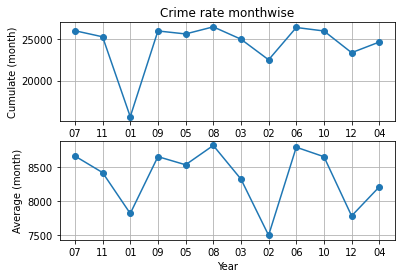

In [34]:
# Plot visualisations

import matplotlib.pyplot as plt
import numpy as np

plt.subplot(2, 1, 1)
plt.plot(monthArray, monthTotalArray, 'o-')
plt.title('Crime rate monthwise')
plt.ylabel('Cumulate (month)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(monthArray, monthAvgArray, 'o-')
plt.xlabel('Year')
plt.ylabel('Average (month)')
plt.grid(True)
plt.savefig("yearlyCrimeAmount.png")
plt.show()

In [35]:
#Creating more Data Frame
# Create dataframe to retrieve information by year (total and average)

YC= sqlContext.sql("select substring(Month, 0, 4) \
as Year, SUM(count) as Total, avg(count) as Average from \
tbl_LeicesterCrimes2 group by substring(Month, 0, 4)")

In [36]:
YC

DataFrame[Year: string, Total: bigint, Average: double]

In [37]:
YC.show()

+----+-----+-----------------+
|Year|Total|          Average|
+----+-----+-----------------+
|2020|97979|8164.916666666667|
|2019|95871|8715.545454545454|
|2021|99007|8250.583333333334|
+----+-----+-----------------+



In [38]:
# Register the yearly data in a temp table and show the contents

YC.registerTempTable("yearlyCrime")
sqlContext.sql("select * from yearlyCrime").show()

+----+-----+-----------------+
|Year|Total|          Average|
+----+-----+-----------------+
|2020|97979|8164.916666666667|
|2019|95871|8715.545454545454|
|2021|99007|8250.583333333334|
+----+-----+-----------------+



In [39]:
# Preparing variables for visualisations

totalArray = sqlContext.sql("select Total from yearlyCrime")\
.rdd.map(lambda f:f[0]).collect()
yearArray = sqlContext.sql("select Year from yearlyCrime")\
.rdd.map(lambda f:f[0]).collect()
averageArray = sqlContext.sql("select Average from yearlyCrime")\
.rdd.map(lambda f:f[0]).collect()

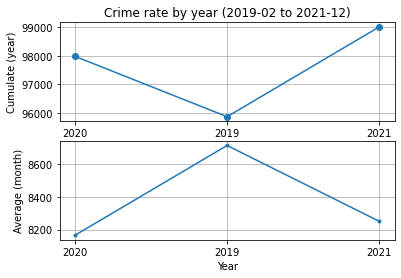

In [40]:
# Plot visualisations
import matplotlib.pyplot as plt
import numpy as np

plt.subplot(2, 1, 1)
plt.plot(yearArray, totalArray, 'o-')
plt.title('Crime rate by year (2019-02 to 2021-12)')
plt.ylabel('Cumulate (year)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(yearArray, averageArray, '.-')
plt.xlabel('Year')
plt.ylabel('Average (month)')
plt.grid(True)
plt.savefig("yearlyCrimeAmount.png")
plt.show()

In [41]:
sqlContext.sql("select Month, substring(Month, 0, 4) \
as Year, SUM(count) as Count from tbl_LeicesterCrimes2 group by Month").show()

+-------+----+-----+
|  Month|Year|Count|
+-------+----+-----+
|2020-06|2020| 8245|
|2019-10|2019| 8762|
|2020-12|2020| 7082|
|2020-02|2020| 7857|
|2021-07|2021| 8694|
|2019-11|2019| 8638|
|2021-04|2021| 8217|
|2021-06|2021| 9299|
|2019-03|2019| 8728|
|2020-05|2020| 8116|
|2021-11|2021| 8718|
|2021-03|2021| 8113|
|2021-02|2021| 6509|
|2019-07|2019| 8871|
|2021-10|2021| 9055|
|2021-12|2021| 8185|
|2020-11|2020| 7918|
|2021-05|2021| 8402|
|2019-05|2019| 9101|
|2020-07|2020| 8441|
+-------+----+-----+
only showing top 20 rows



In [42]:
LeicesterCrime.printSchema()

root
 |-- Crime_ID: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Reported_by: string (nullable = true)
 |-- Falls_within: string (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- LSOA_code: string (nullable = true)
 |-- LSOA_name: string (nullable = true)
 |-- Crime_type: string (nullable = true)
 |-- Last_outcome_category: string (nullable = true)



In [43]:
# Try to find out some insights by exploring Crime Types with new temp table

In [44]:
# Creating a Temp Table

LeicesterCrime.registerTempTable("tbl_LeicesterCrimeTypes")

In [45]:
# Exploring Crime Types per year/month

CT = sqlContext.sql("select Crime_type, Month, \
substring(Month, 0, 4) as Year,\
count(*) as Count from tbl_LeicesterCrimeTypes group by Month, Crime_type")


In [46]:
CT.show()

+--------------------+-------+----+-----+
|          Crime_type|  Month|Year|Count|
+--------------------+-------+----+-----+
|Criminal damage a...|2019-06|2019|  880|
|       Bicycle theft|2020-07|2020|   83|
|            Burglary|2020-06|2020|  311|
|Anti-social behav...|2021-10|2021|  786|
|Theft from the pe...|2019-09|2019|   54|
|Violence and sexu...|2021-01|2021| 2703|
|         Other theft|2019-03|2019|  709|
|             Robbery|2020-07|2020|   80|
|Theft from the pe...|2019-08|2019|   55|
|        Public order|2019-09|2019|  788|
|Anti-social behav...|2021-04|2021|  957|
|         Other crime|2020-12|2020|  183|
|Criminal damage a...|2019-07|2019|  878|
|Possession of wea...|2021-08|2021|   86|
|            Burglary|2020-10|2020|  487|
|Criminal damage a...|2020-03|2020|  807|
|Anti-social behav...|2020-09|2020| 1157|
|             Robbery|2021-05|2021|   60|
|            Burglary|2021-12|2021|  382|
|Criminal damage a...|2021-03|2021|  749|
+--------------------+-------+----

In [47]:
import pixiedust

Pixiedust database opened successfully



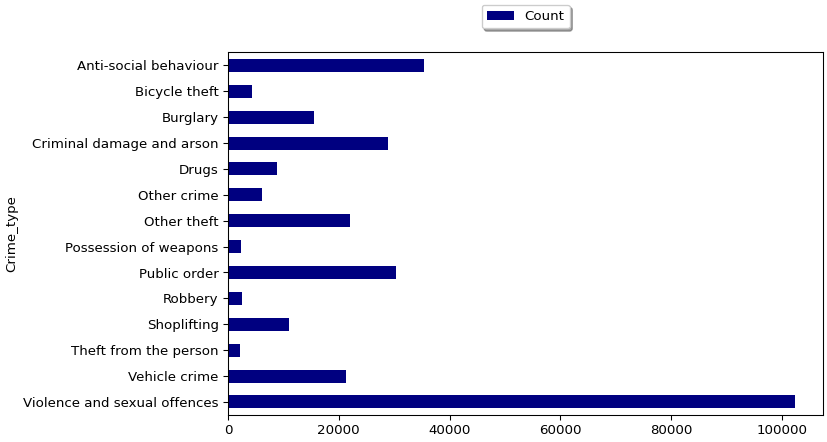

In [48]:
display(CT)


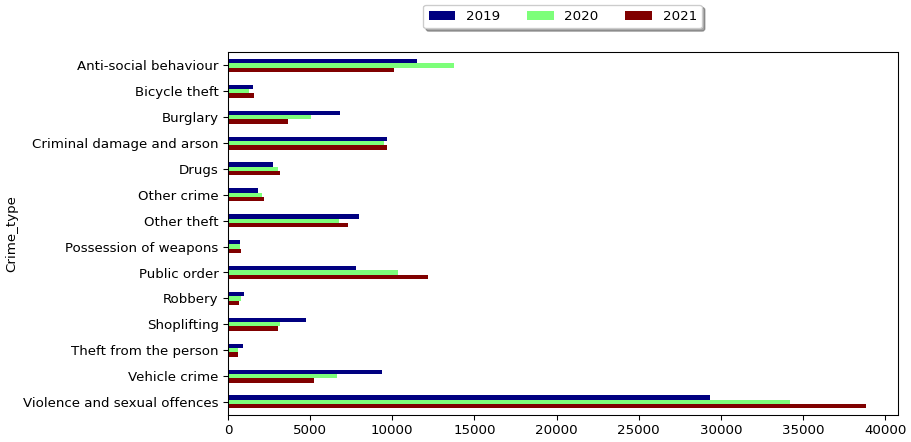

In [49]:
display(CT)


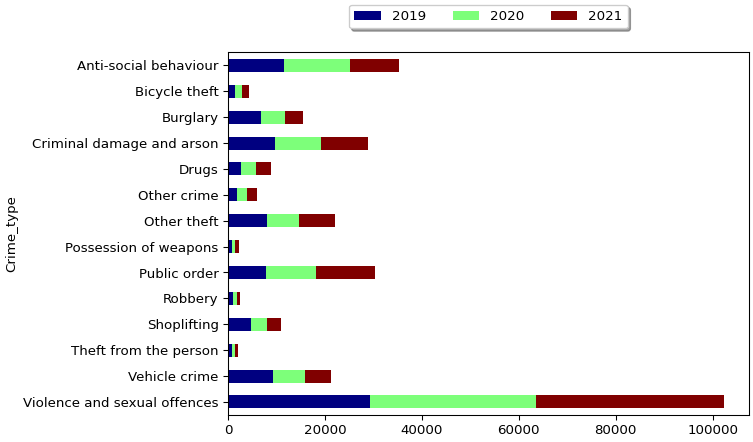

In [50]:
display(CT)

In [51]:
# Create new Data Frame for geographical Visulisations

# Explore Crime Types per year/month

CTGeo = sqlContext.sql("select Crime_type, Month, \
substring(Month, 0, 4) as Year, Latitude, Longitude, \
count(*) as Count from tbl_LeicesterCrimeTypes group by Month, \
Crime_type, Latitude, Longitude")


In [52]:
display(CTGeo)